#Project 1: Comprehensive Regression Analysis

### Team Name:Team DB
### Name and ID of Member 1:Biswajit Paul B2430043
### Name and ID of Member 2:Debdeep Das B2430046

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

#1. Load the Dataset

In [ ]:
# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/xbwlp/data/master/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#Showing Some Basic Statistics



In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#2. Data Preprocessing

# Calculating Missing Values

In [ ]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


#Handling Missing Values

In [ ]:


# Select the features that you want to impute
features_with_missing = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply imputer to the selected columns
df[features_with_missing] = imputer.fit_transform(df[features_with_missing])


In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


#Changing catagorical values to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply the encoder to the 'CHAS' column
df['CHAS'] = encoder.fit_transform(df['CHAS'])


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(506, 13)
(506,)


#Splitting the data

In [ ]:
# Assuming X and y are already defined

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)


# 3. Simple Linear Regression

In [ ]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 24.931738407764183
R-squared: 0.6600238344003309


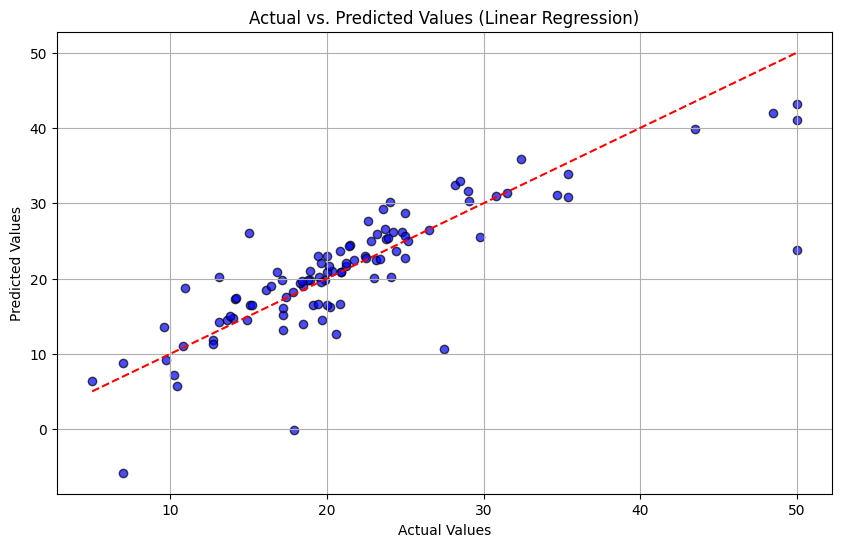

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

#4. Polynomial Regression

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)



LinearRegression()

In [ ]:
y_pred_poly = poly_regressor.predict(X_test_poly)

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

Mean Squared Error (Polynomial Regression): 17.230675395890778
R-squared (Polynomial Regression): 0.7650376858613591


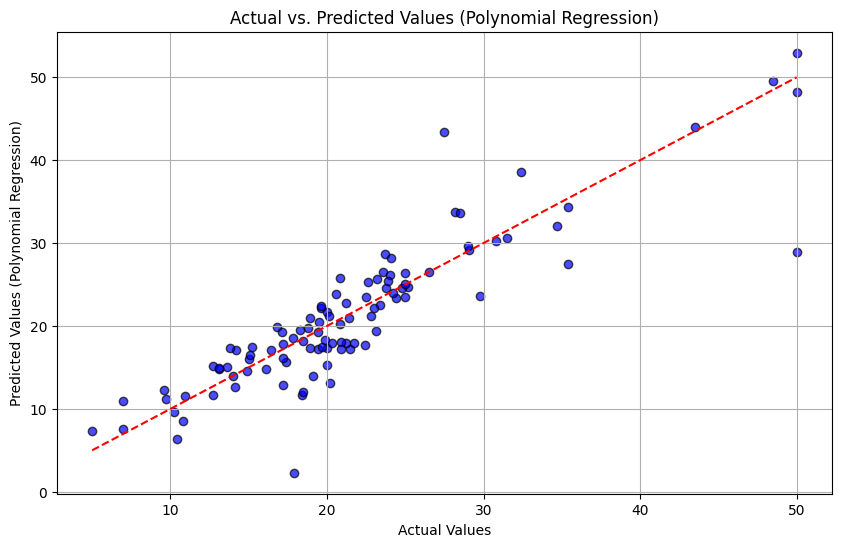

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Polynomial Regression)')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

#5. Gradient Descent Methods

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept) to scaled X
X_scaled = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

#Batch Gradient Descent

In [ ]:


X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add a column of ones for the intercept

# Initialize theta (parameters)
theta = np.zeros(X_b.shape[1])

# Define the gradient descent function
def batch_gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Run gradient descent
theta_final, cost_history = batch_gradient_descent(X_b, y, theta)

theta_final, cost_history[-1]  # Display final theta and last cost value

(array([11.26640316, 11.26640316, -0.9001478 ,  0.87216261, -0.42144292,
         0.68288475, -1.84477589,  2.96581977, -0.32592313, -3.13830231,
         1.84658641, -1.29761875, -1.97162881,  0.85393749, -3.24385168]),
 22.85421672364366)

In [ ]:
y_pred = X_b.dot(theta_final)  # Predicted values
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y, y_pred)

mse, rmse, r2

(22.854216723643663, 4.780608405176444, 0.7292781700798541)

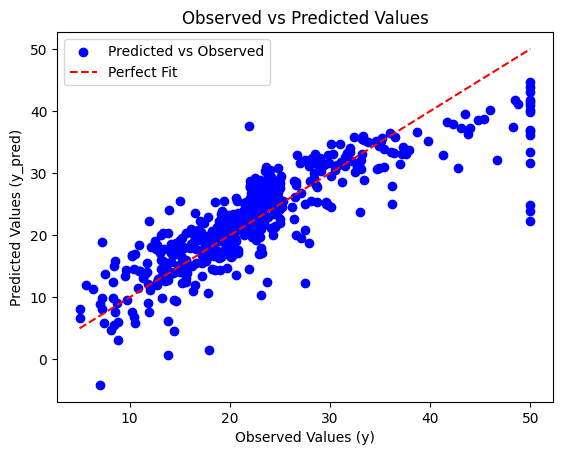

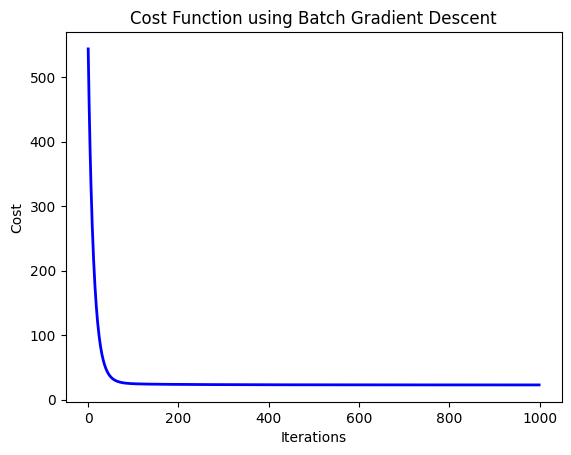

In [ ]:
import matplotlib.pyplot as plt

# Plotting observed vs predicted values
plt.scatter(y, y_pred, color='blue', label='Predicted vs Observed')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')  # 45-degree line

plt.xlabel('Observed Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()

# Plotting the cost function over iterations
plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function using Batch Gradient Descent')
plt.show()


#  Stochastic Gradient Descent

Mean Squared Error: 24.710560171258944
Root Mean Squared Error: 4.9709717532147515
R² Score: 0.7072886746105663


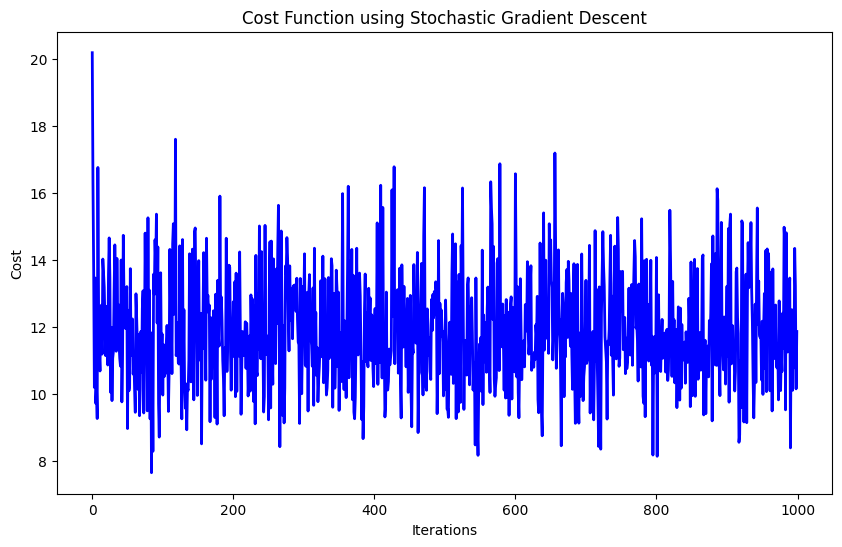

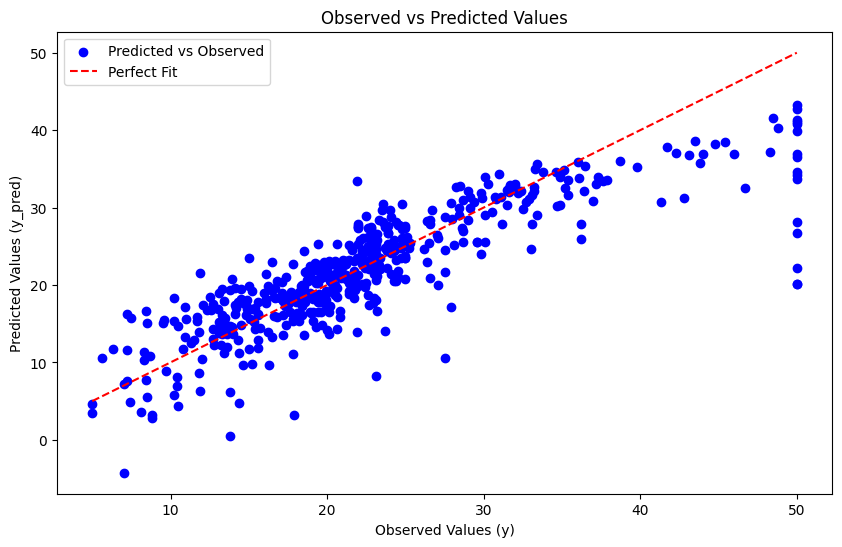

In [ ]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Function for stochastic gradient descent
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    np.random.seed(42)  # For reproducibility

    for iteration in range(n_iterations):
        cost = 0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]

            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradients

            # Compute the cost for this single example and add to total cost
            cost += (1/m) * np.sum((X_i.dot(theta) - y_i) ** 2)

        cost_history[iteration] = cost  # Average cost for all data points after this iteration

    return theta, cost_history

# Initialize theta (parameters)
theta = np.zeros(X_b.shape[1])

# Run stochastic gradient descent
theta_final, cost_history = stochastic_gradient_descent(X_b, y, theta)

# Predicted values
y_pred = X_b.dot(theta_final)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function using Stochastic Gradient Descent')
plt.show()

# Plotting Observed vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Observed')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')  # 45-degree line
plt.xlabel('Observed Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()


#Mini Batch Gradient Descent

Mean Squared Error: 22.85548589060416
Root Mean Squared Error: 4.78074114448839
R² Score: 0.7292631360401328


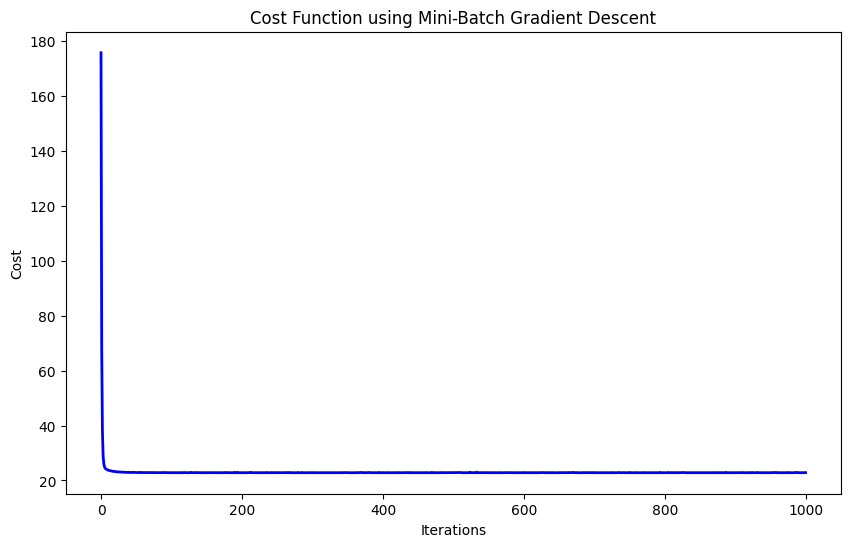

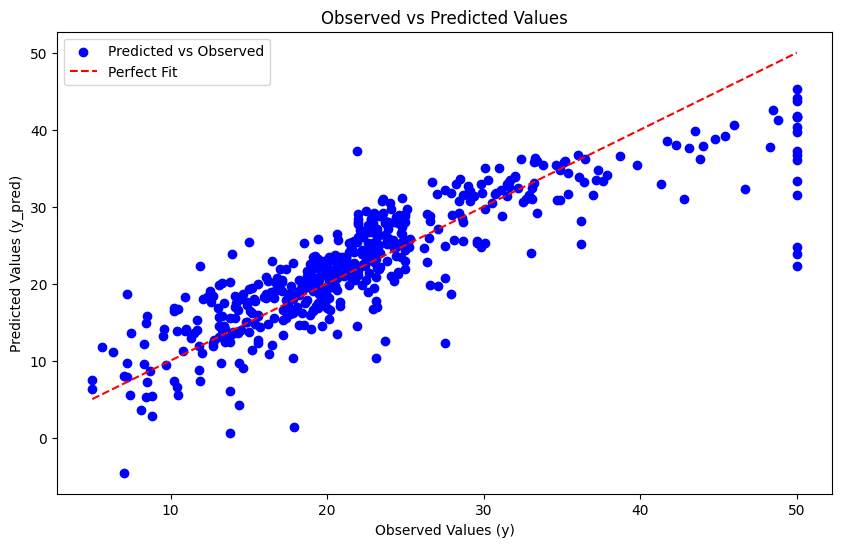

In [ ]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Function for mini-batch gradient descent
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000, batch_size=32):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    np.random.seed(42)  # For reproducibility

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)  # Shuffle the data
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            gradients = (2/len(y_i)) * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradients

        # Compute cost for entire dataset after each iteration
        cost_history[iteration] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Initialize theta (parameters)
theta = np.zeros(X_b.shape[1])

# Run mini-batch gradient descent
theta_final, cost_history = mini_batch_gradient_descent(X_b, y, theta)

# Predicted values
y_pred = X_b.dot(theta_final)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function using Mini-Batch Gradient Descent')
plt.show()

# Plotting Observed vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Observed')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')  # 45-degree line
plt.xlabel('Observed Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()


#6. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

#Ridge Regression model

In [ ]:
# Initialize Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model
ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)

print("Mean Squared Error (Ridge Regression):", mse_ridge)
print("R-squared (Ridge Regression):", r2_ridge)


Mean Squared Error (Ridge Regression): 24.093414483574566
R-squared (Ridge Regression): 0.671455454154038


#Lasso Regression Model

In [ ]:
# Initialize Lasso Regression model
lasso_regressor = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model
lasso_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_regressor.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (Lasso Regression):", mse_lasso)
print("R-squared (Lasso Regression):", r2_lasso)


Mean Squared Error (Lasso Regression): 56.60674827651768
R-squared (Lasso Regression): 0.2280945311008501


#Elastic Net Regressor Model

In [ ]:
# Initialize Elastic Net Regression model
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the mix of Lasso and Ridge

# Fit the model
elastic_net_regressor.fit(X_train, y_train)

# Make predictions
y_pred_elastic = elastic_net_regressor.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Mean Squared Error (Elastic Net Regression):", mse_elastic)
print("R-squared (Elastic Net Regression):", r2_elastic)


Mean Squared Error (Elastic Net Regression): 61.82619255668901
R-squared (Elastic Net Regression): 0.15692072749712027


#Implimentation of Early stopping

Early stopping at iteration 27
Mean Squared Error: 27.10139005363673
Root Mean Squared Error: 5.205899543175677
R² Score: 0.6789678684936158


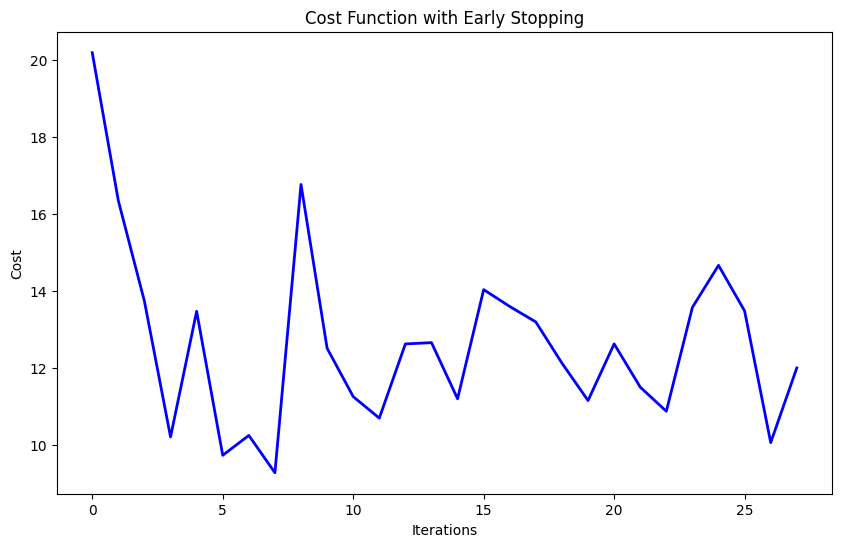

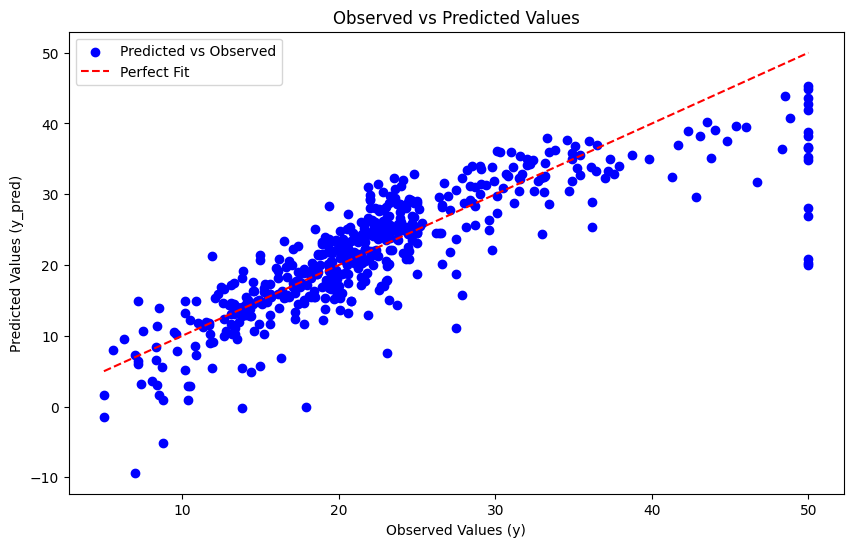

In [ ]:
# Adding intercept (bias) term again
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Function for stochastic gradient descent with early stopping
def stochastic_gradient_descent_early_stopping(X, y, theta, learning_rate=0.01, n_iterations=1000, patience=20, tol=1e-4):
    m = len(y)
    cost_history = []
    np.random.seed(42)  # For reproducibility
    best_cost = float('inf')
    no_improvement_count = 0

    for iteration in range(n_iterations):
        cost = 0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]

            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradients

            # Compute the cost for this single example
            cost += (1/m) * np.sum((X_i.dot(theta) - y_i) ** 2)

        cost_history.append(cost)  # Store cost history

        # Early stopping: Check for improvement in cost
        if cost < best_cost - tol:
            best_cost = cost
            no_improvement_count = 0  # Reset counter
        else:
            no_improvement_count += 1

        # If no improvement for 'patience' iterations, stop training
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {iteration}")
            break

    return theta, cost_history

# Initialize theta (parameters)
theta = np.zeros(X_b.shape[1])

# Run stochastic gradient descent with early stopping
theta_final, cost_history = stochastic_gradient_descent_early_stopping(X_b, y, theta)

# Predicted values
y_pred = X_b.dot(theta_final)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function with Early Stopping')
plt.show()

# Plotting Observed vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Observed')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')  # 45-degree line
plt.xlabel('Observed Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()


#7. Normal Equation

In [ ]:
# Normal equation: theta = (X^T * X)^(-1) * X^T * y
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Compute theta using the normal equation
theta = normal_equation(X_train, y_train)
print("Theta (Normal Equation):", theta)
# Make predictions on the test set
y_pred_normal = X_test.dot(theta)
# Calculate Mean Squared Error
mse_normal = mean_squared_error(y_test, y_pred_normal)
# Calculate R-squared
r2_normal = r2_score(y_test, y_pred_normal)

print("Mean Squared Error (Normal Equation):", mse_normal)
print("R-squared (Normal Equation):", r2_normal)


Theta (Normal Equation): [-8.68494379  3.61654698  2.96703082  2.42257863 -2.26313093 37.64372969
  0.7606413  -5.38028228  3.39147384 -4.04078157 -4.05845922 10.89090539
 -9.60940735]
Mean Squared Error (Normal Equation): 35.87548088632668
R-squared (Normal Equation): 0.5107918978092895


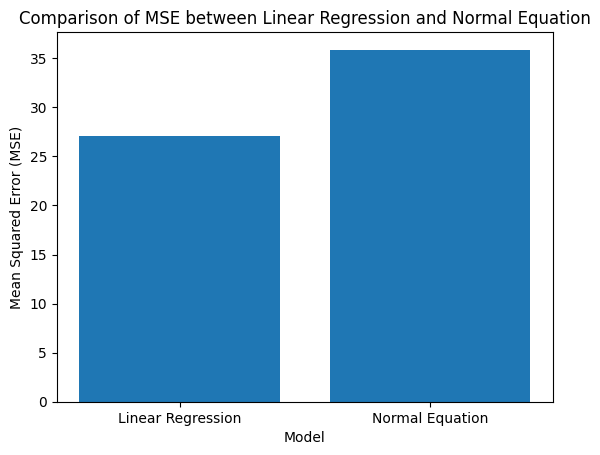

In [ ]:
#  plot the mse of normal equation wrt linear regression

import matplotlib.pyplot as plt

# Assuming mse and mse_normal are already defined from previous code

# Create a list of MSE values
mse_values = [mse, mse_normal]
labels = ['Linear Regression', 'Normal Equation']

# Create the bar plot
plt.bar(labels, mse_values)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between Linear Regression and Normal Equation')

# Display the plot
plt.show()



#8. Implement linear Regression using SVD

In [ ]:
def svd_regression(X, y):
    # Perform SVD on the feature matrix X
    U, sigma, Vt = np.linalg.svd(X, full_matrices=False)

    # Compute the pseudoinverse of the diagonal matrix Sigma
    sigma_inv = np.diag(1 / sigma)

    # Calculate theta using the formula theta = V * Sigma_inv * U.T * y
    theta = Vt.T.dot(sigma_inv).dot(U.T).dot(y)

    return theta

# Compute theta using SVD
theta_svd = svd_regression(X_train, y_train)
print("Theta (SVD):", theta_svd)
# Make predictions on the test set
y_pred_svd = X_test.dot(theta_svd)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse_svd = mean_squared_error(y_test, y_pred_svd)
# Calculate R-squared
r2_svd = r2_score(y_test, y_pred_svd)

print("Mean Squared Error (SVD):", mse_svd)
print("R-squared (SVD):", r2_svd)


Theta (SVD): [-8.68494379  3.61654698  2.96703082  2.42257863 -2.26313093 37.64372969
  0.7606413  -5.38028228  3.39147384 -4.04078157 -4.05845922 10.89090539
 -9.60940735]
Mean Squared Error (SVD): 35.87548088632686
R-squared (SVD): 0.510791897809287


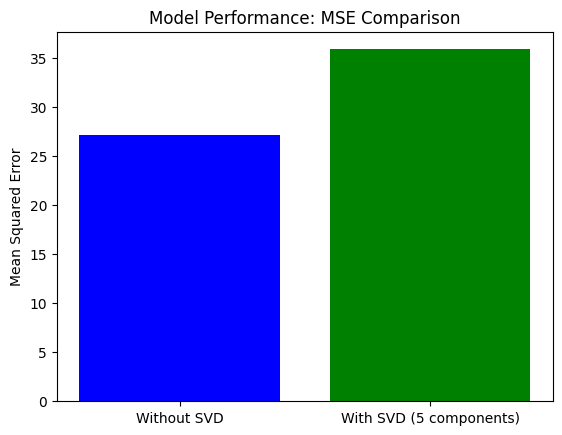

In [ ]:


# Plotting the MSE for both models
labels = ['Without SVD', 'With SVD (5 components)']
mse_values =[mse, mse_svd]

plt.bar(labels, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Model Performance: MSE Comparison')
plt.show()

#9. Performance Metrics and Computational Analysis

In [ ]:
import time
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Record start time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Record end time
    end_time = time.time()

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate training time
    training_time = end_time - start_time

    return mse, r2, training_time

mse_linear, r2_linear, time_linear = evaluate_model(regressor, X_train, y_train, X_test, y_test)

print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}, Training Time: {time_linear}")

mse_poly, r2_poly, time_poly = evaluate_model(poly_regressor, X_train_poly, y_train, X_test_poly, y_test)

print(f"Polynomial Regression - MSE: {mse_poly}, R2: {r2_poly}, Training Time: {time_poly}")

mse_ridge, r2_ridge, time_ridge = evaluate_model(ridge_regressor, X_train, y_train, X_test, y_test)

print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}, Training Time: {time_ridge}")

mse_lasso, r2_lasso, time_lasso = evaluate_model(lasso_regressor, X_train, y_train, X_test, y_test)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, Training Time: {time_lasso}")

mse_elastic, r2_elastic, time_elastic = evaluate_model(elastic_net_regressor, X_train, y_train, X_test, y_test)

print(f"Elastic Net Regression - MSE: {mse_elastic}, R2: {r2_elastic}, Training Time: {time_elastic}")

mse_bd,r2_bd,time_bd = evaluate_model(regressor, X_train, y_train, X_test, y_test)

print(f"Batch Gradient Descent - MSE: {mse_bd}, R2: {r2_bd}, Training Time: {time_bd}")


Linear Regression - MSE: 24.931738407764183, R2: 0.6600238344003309, Training Time: 0.0026307106018066406
Polynomial Regression - MSE: 17.230675395890778, R2: 0.7650376858613591, Training Time: 0.07578730583190918
Ridge Regression - MSE: 24.093414483574566, R2: 0.671455454154038, Training Time: 0.006807804107666016
Lasso Regression - MSE: 56.60674827651768, R2: 0.2280945311008501, Training Time: 0.0019714832305908203
Elastic Net Regression - MSE: 61.82619255668901, R2: 0.15692072749712027, Training Time: 0.0018072128295898438
Batch Gradient Descent - MSE: 24.931738407764183, R2: 0.6600238344003309, Training Time: 0.005444049835205078


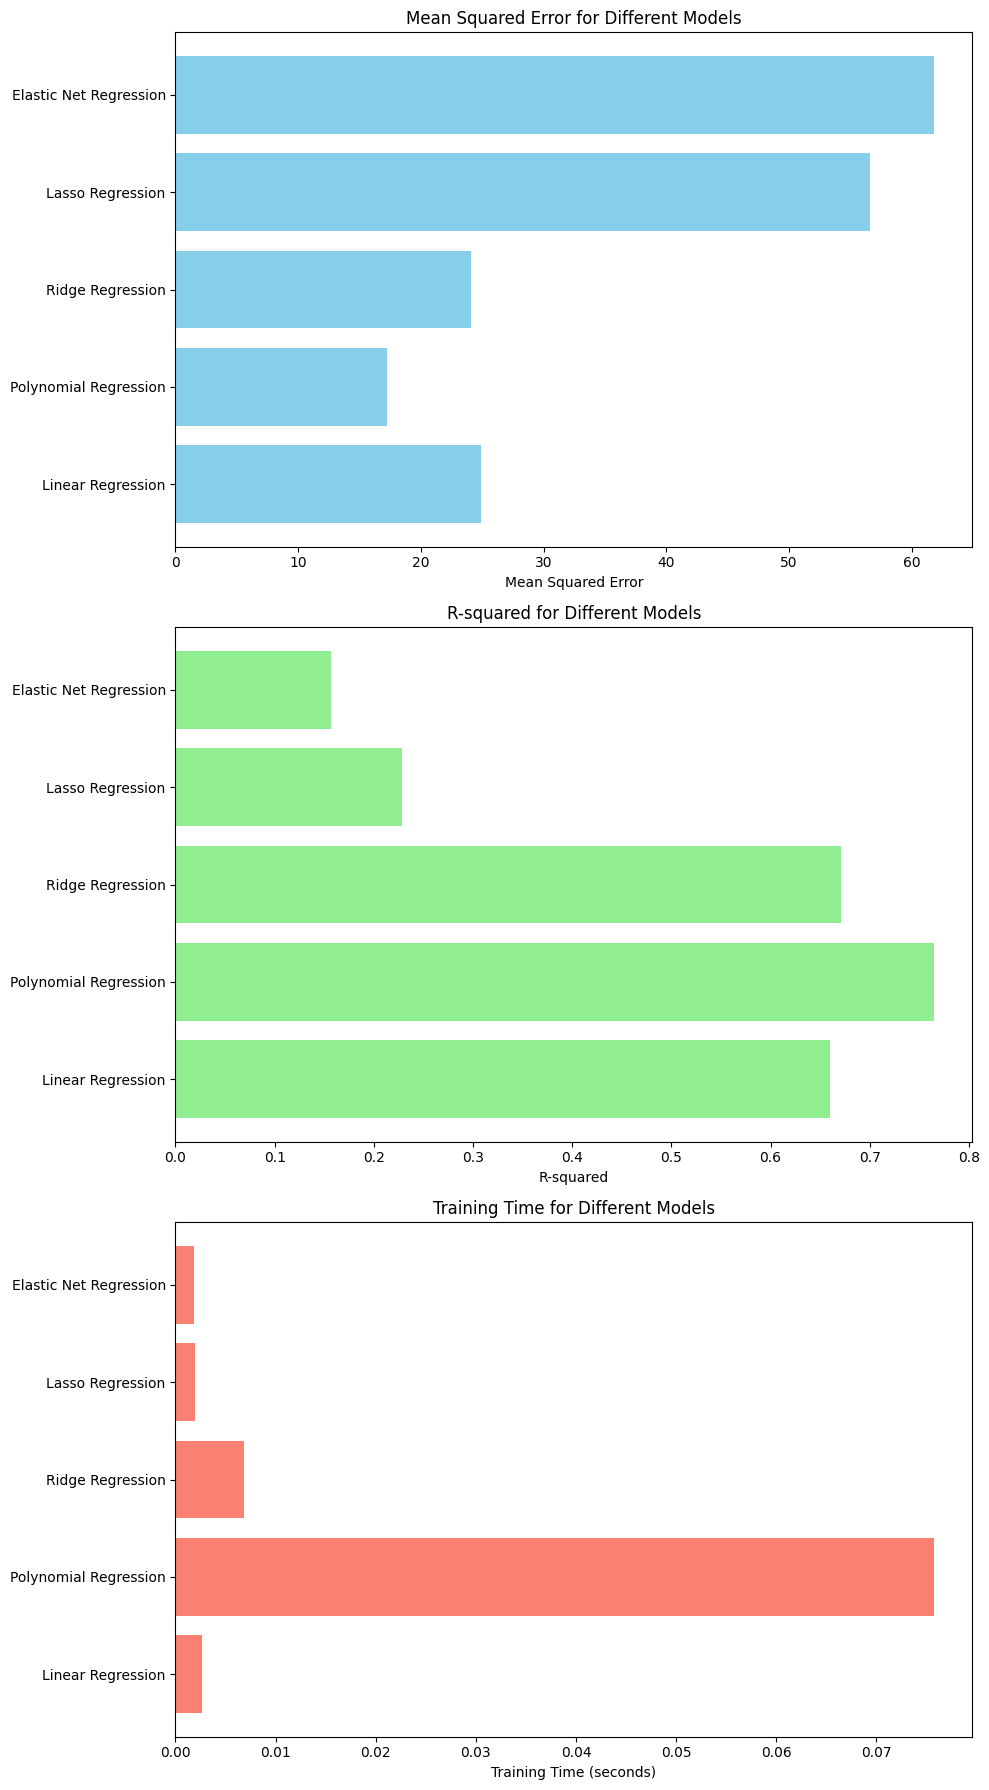

In [ ]:


# Data Preparation
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression',
          'Lasso Regression', 'Elastic Net Regression']
mse_values = [mse_linear, mse_poly, mse_ridge, mse_lasso, mse_elastic]
r2_values = [r2_linear, r2_poly, r2_ridge, r2_lasso, r2_elastic]
training_times = [time_linear, time_poly, time_ridge, time_lasso, time_elastic]

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# MSE Plot
ax[0].barh(models, mse_values, color='skyblue')
ax[0].set_xlabel('Mean Squared Error')
ax[0].set_title('Mean Squared Error for Different Models')

# R² Plot
ax[1].barh(models, r2_values, color='lightgreen')
ax[1].set_xlabel('R-squared')
ax[1].set_title('R-squared for Different Models')

# Training Time Plot
ax[2].barh(models, training_times, color='salmon')
ax[2].set_xlabel('Training Time (seconds)')
ax[2].set_title('Training Time for Different Models')

plt.tight_layout()
plt.show()


#10. Conclusion

After performing both polynomial regression and linear Regression on the HousingData dataset, we found notable differences in model performance. The polynomial regression model, which incorporates non-linear relationships between the feature RM (average number of rooms) and the target MEDV (median house price), demonstrated a better fit to the data. This is reflected in the lower mean squared error (MSE) and higher R-squared (R²) value when compared to the linear SVD approach.

Specifically, polynomial regression achieved an MSE of 17.23 and an R² of 0.765, indicating that it captured more variability in the data and had less prediction error. In contrast, the linear regression model had a higher MSE of 24.93 and a lower R² score of 0.66, suggesting it may not have captured the underlying complexity of the relationship as effectively.

But after using  gradient descent and various other regularization methods , we managed to improve the MSE to 22.85 and R² to 0.73

Overall, polynomial regression provides a more accurate representation of the data due to its ability to model non-linear patterns, whereas linear regression, being a linear method, struggled to capture the nuances in this specific dataset. Depending on the dataset and the relationships between features, polynomial models can often outperform linear techniques when the underlying data exhibits non-linear behaviors.



In [481]:
# Colab2PDF v1.0.2 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=False # @param {type:"boolean"}
    if ENABLE:
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>